*** Note**: Large image size!! ***Do not click on the image*** as it may take considerable time to load.

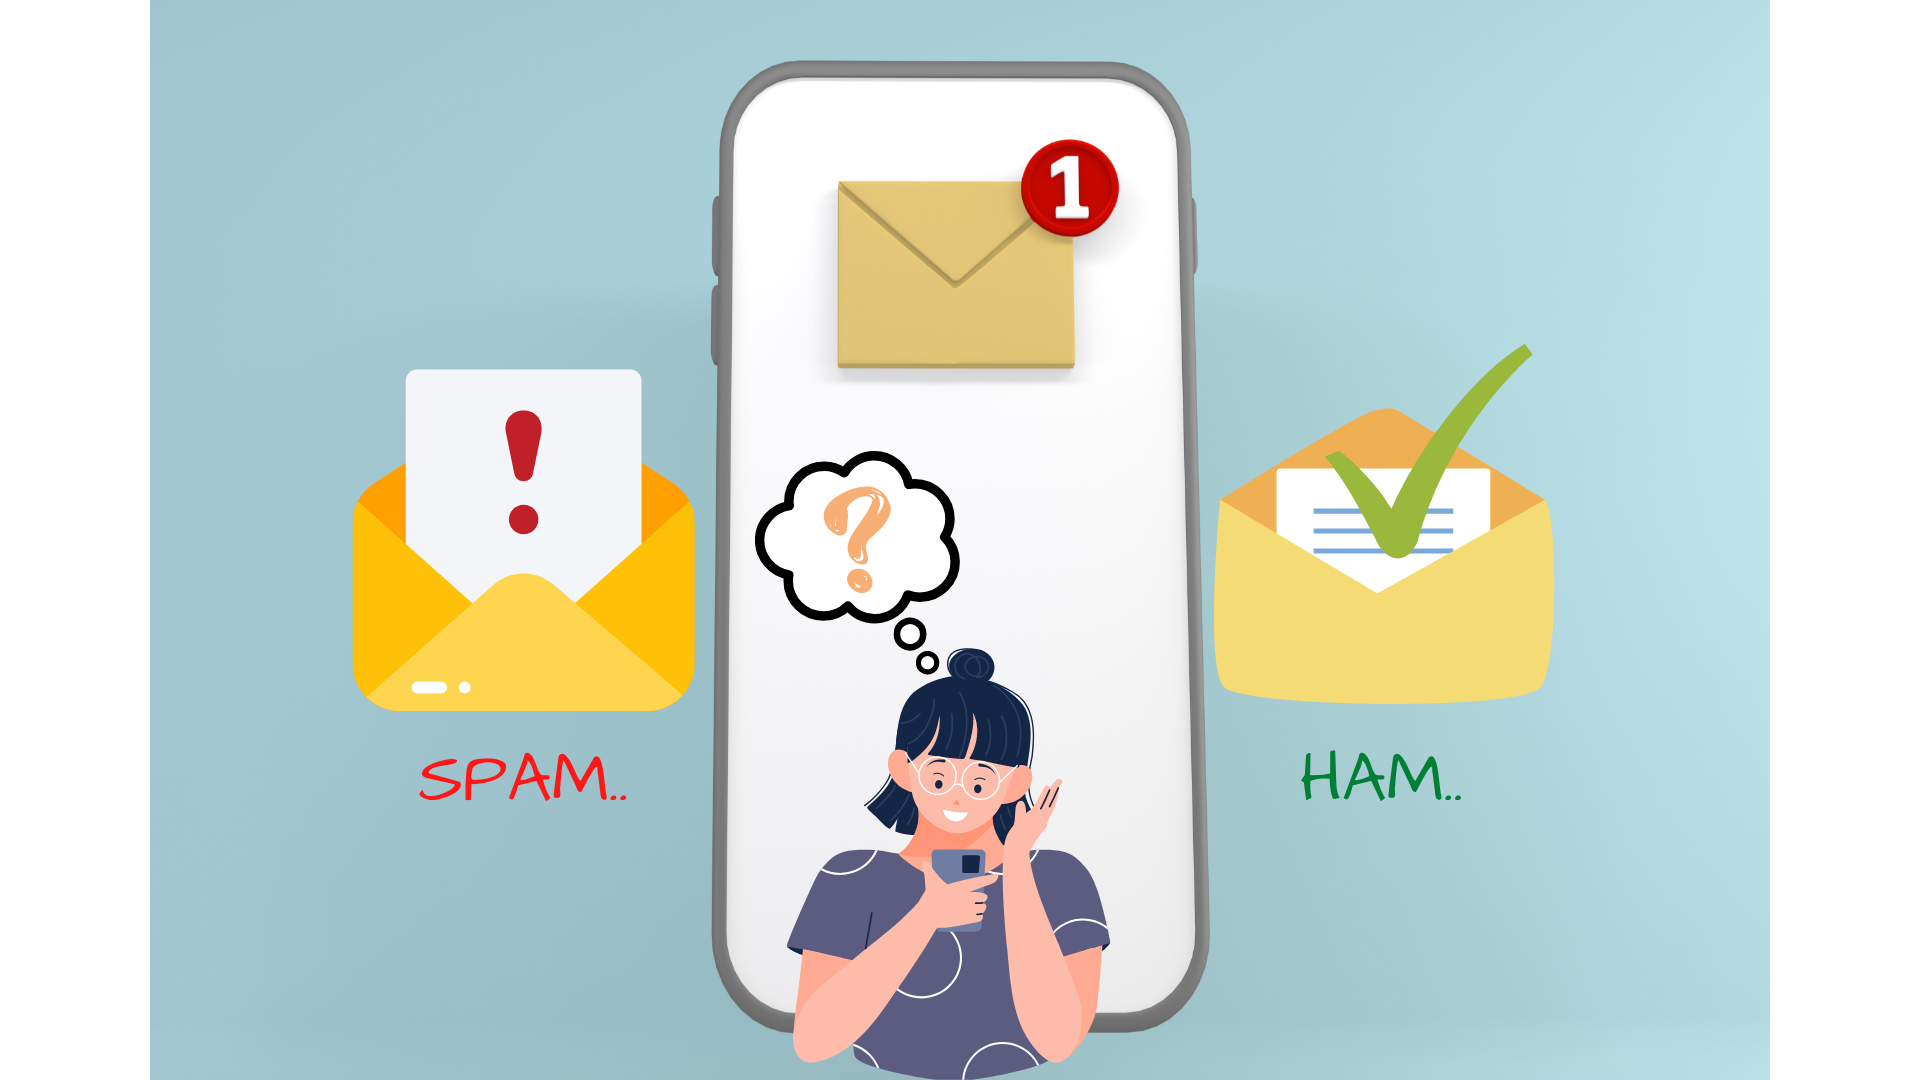

**1. Problem Context**
Many users worldwide rely on email and text messages for communication and they have become an essential part of daily life. Emails and text messages contain a lot of sensitive information that hackers attempt to steal, which is known as data theft. As a result, it is critical to distinguish between spam and ham emails.

Genuine mail/text that is important to the user and informative is referred to as ham. Spam, on the other hand, is bogus mail/text sent from untrustworthy sources with malicious intent. <br><br>
**1.1 Data Dictionary**
* **Text:** Messages sent by the users
* **Type:** Target variable which provides information about a message being Spam or Ham <br><br>

**1.2 Objective**
Creating the vectors for the text data using the basic techniques like Bag of Words and TF-IDF.


#**2. Overview of the dataset**

### **2.1 Importing necessary libraries**



In [1]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to remove the punctuation
import string

# Helps to create the counter 
from collections import Counter

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the vectorization classes
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### **2.2 Loading the dataset**

We are loading the cleaned data from the notebook HAM vs Spam notebook, to avoid the repetative preprocessing steps. As we mentioned earlier, now let's learn and implement the vectorization techniques other than one hot encoding.

In [2]:
messages = pd.read_csv('SMS_spam.csv', index_col = [0])

In [3]:
# Creating the copy of the data frame
data = messages.copy()

### **2.3 Understanding the dataset**

In [4]:
# View the first 5 rows of the dataset
data.head(5)

,type,text
0,ham,hope having good checking
1,ham,dong cbe bt pay
2,ham,ask mummy father
3,ham,fyi usf swing room
4,ham,sure thing big hockey election longer hour


In [5]:
# View the last five rows of the dataset
data.tail(5)

,type,text
4023,spam,cd congratulation ur awarded ps500 cd gift voucher ps125 gift guaranteed reentry 2 ps100 draw xt music 87066 tn
4024,spam,mobile 11myths update free orange latest colour camera mobile unlimited weekend mobile upd8 freeform 08000839402 2stoptxt
4025,spam,3 lion england reply lion 4 mono lion 4 4 2 original n tone 3gb network operator rate
4026,spam,ur balance ur question sang 2 answer txt ur answer good
4027,spam,ac energy u know 2channel 2day ur leadership skill r reply an reply end sco


In [6]:
# Checking the shape of the dataset
data.shape

(4028, 2)

In [7]:
# Checking the datatypes and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 4027
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    4028 non-null   object
 1   text    4028 non-null   object
dtypes: object(2)
memory usage: 94.4+ KB


In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

In [9]:
# Checking for missing values
data.isna().sum()

type    0
text    0
dtype: int64

In [10]:
data['type'].value_counts()

ham     3414
spam     614
Name: type, dtype: int64

#### **Observations:**
* There are total **4028 rows** and **2 columns** in the dataset.
* All the columns are **object** type.
* There are **no duplicate values** in the data.
* There are **no null values** in the dataset.
* Majority of the messages(around 85%) are of **ham** class.

In [11]:
# this library is used to expand contractions
!pip install contractions

In [12]:
# Helps to extract the data using regular expressions
import re
import nltk
import contractions
nltk.download('punkt')
nltk.download('all')

from nltk.corpus import stopwords
from nltk import word_tokenize
# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\nsinha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |    

In [13]:
# function for text pre-processing
def clean_text(df, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', df)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', df)

    # Removing the punctuations using regular expression
    # i.e remove anything which is not word or whitespace character
    
    string = re.sub(r'[^\w\s]', '', df)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stopwords.words('english')])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    #tokenize data
    string = word_tokenize(string)

    #remove number
    string=[s for s in string if s.isalpha()]

    #lemmatize the data
    string= [WordNetLemmatizer().lemmatize(i) for i in string]

    #fix contractions (example: "'cause": "because","could've": "could have",etc)
    string = ' '.join([contractions.fix(word) for word in string])


    return string 
    #return " ".join(string)       


In [28]:
data["text"] = data["text"].astype(str) 
data['clean_text'] = data['text'].apply(clean_text)

#**3. Exploratory Data Analysis**

Let's have a look into the text data to understand the most frequent words -

In [29]:
# spam messages
data_spam = data[data['type'] == 'spam']

# ham messages
data_ham = data[data['type'] == 'ham']

In [30]:
data_spam.head(5)

,type,text,clean_text
3414,spam,complimentary 4 star biz holiday cash need urgent 09066364349 landing lose,complimentary star biz holiday cash need urgent landing lose
3415,spam,dear dave final notice collect tenerife holiday cash 09061743806 tc sae box326 cw25wx 150ppm,dear dave final notice collect tenerife holiday cash tc sae
3416,spam,marvel mobile play official ultimate game ur mobile right text spider 83338 game ll send u free 8ball wallpaper,marvel mobile play official ultimate game you are mobile right text spider game send you free wallpaper
3417,spam,u win ps100 music gift voucher week starting txt word draw 87066 sc,you win music gift voucher week starting txt word draw sc
3418,spam,u won nokia 6230 plus free digital u u win free send nokia 83383 16,you nokia plus free digital you you win free send nokia


In [34]:
def top_n_ngram(corpus, n = None, ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

**UNIGRAM**

<AxesSubplot:xlabel='Frequent Words in Spam Texts'>

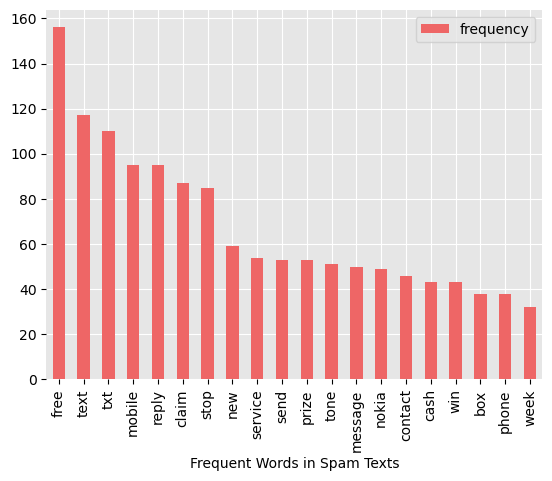

In [32]:
words1 = top_n_ngram(data_spam['clean_text'], 20, 1)
df_s = pd.DataFrame(words1, columns=['Frequent Words in Spam Texts', 'frequency'])
df_s.plot(kind='bar', x='Frequent Words in Spam Texts')

- A few keywords such as '**Free'**, **'Claim', 'Prize', 'Cash', 'Win'**, and so on correctly indicate that the messages sometimes contains a fake prize offering and is a scam.

<AxesSubplot:xlabel='Frequent Words in Ham Texts'>

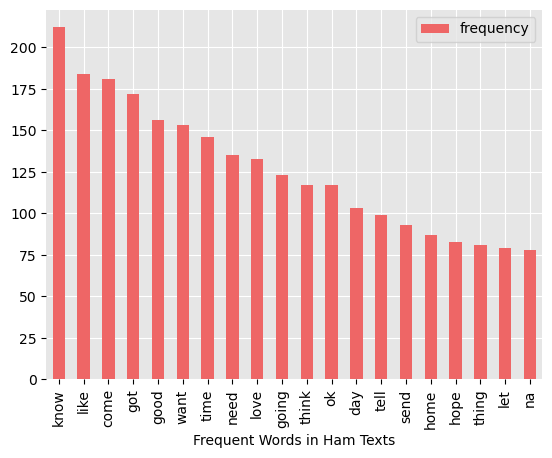

In [33]:
words2 = top_n_ngram(data_ham['clean_text'], 20, 1)
df_h = pd.DataFrame(words2, columns=['Frequent Words in Ham Texts', 'frequency'])
df_h.plot(kind='bar', x='Frequent Words in Ham Texts')

- The majority of the common words here are generic here, which is obvious for 'Ham' class.

<AxesSubplot:xlabel='Frequent Words in whole Texts'>

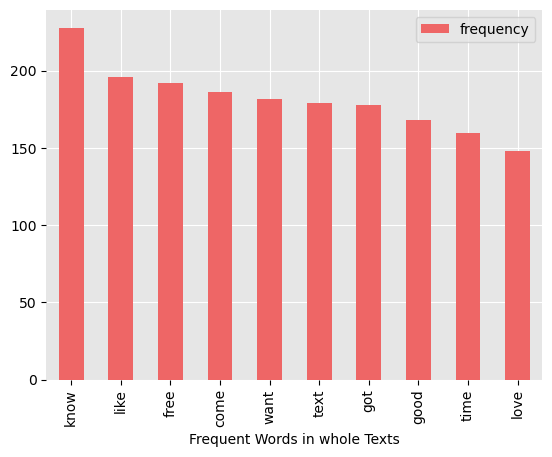

In [35]:
words3 = top_n_ngram(data['clean_text'], 10, 1)
df_w = pd.DataFrame(words3, columns=['Frequent Words in whole Texts', 'frequency'])
df_w.plot(kind='bar', x='Frequent Words in whole Texts')

- Once again, the most common words in the combined text of both Spam and ham are generic words only, which is understandable given that the majority of the entries in this dataset are of the Ham class.

Now let's create the vectors for the text data using Bag-of-Words and TF-IDF techniques.

### **3.1 Bag-of-Words**
A bag of words is a representation of text that describes the occurrence of words within a document.

In [36]:
# Creating the Bag of Words model
# setting the max features to 1500
cv = CountVectorizer(max_features = 200) #TBD

**CountVectorizer** has several parameters that are useful to create the effective model. We mostly, use below three parameters in CountVectorizer() function.

- **ngram_range:** The lower and upper bounds of the range of n-values to be extracted for distinct n-grams. All values of n such that min_n <= n <= max_n will be used. An n gram range of (1, 1), for example, denotes just unigrams, (1, 2), unigrams and bigrams, and (2, 2), only bigrams.


- **analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’:** Whether the feature should be formed out of character n-grams or word n-grams. Option 'char wb' generates character n-grams mainly from text within word boundaries; n-grams outside of word boundaries are padded with space.


- **max_features(int), default=None:** If not None, creates a vocabulary that only considers the top max features sorted by term frequency across the corpus.


There are other parameters which can be useful for data cleaning, refer to this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">source</a> to explore more abput it.

In [37]:
# fit and transforming into vectors from the text data
vectors = cv.fit_transform(data['clean_text']).toarray()

In [38]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", cv.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vectors)

Vocabulary:  {'hope': 69, 'good': 53, 'pay': 115, 'ask': 4, 'room': 135, 'sure': 154, 'thing': 162, 'big': 11, 'hour': 70, 'work': 191, 'night': 108, 'tell': 157, 'told': 167, 'you': 199, 'wan': 179, 'come': 27, 'coming': 28, 'wish': 189, 'gun': 57, 'sent': 140, 'think': 163, 'cost': 30, 'contact': 29, 'love': 91, 'need': 104, 'stop': 152, 'are': 3, 'today': 166, 'plan': 121, 'sleep': 144, 'said': 137, 'cannot': 17, 'wait': 177, 'hear': 62, 'text': 158, 'oh': 113, 'got': 54, 'job': 73, 'is': 72, 'yeah': 195, 'use': 174, 'help': 64, 'let': 81, 'like': 83, 'leave': 79, 'min': 97, 'pick': 119, 'tomorrow': 168, 'dun': 38, 'hey': 65, 'want': 180, 'co': 26, 'going': 51, 'enjoy': 41, 'book': 13, 'minute': 98, 'thought': 164, 'that': 161, 'soon': 147, 'mean': 93, 'time': 165, 'stuff': 153, 'phone': 118, 'look': 88, 'lot': 90, 'word': 190, 'do': 36, 'not': 110, 'holiday': 67, 'send': 139, 'heart': 63, 'feel': 43, 'day': 33, 'go': 50, 'miss': 99, 'long': 87, 'know': 75, 'remember': 132, 'wat': 1

In [39]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['ham', 'spam'], yticklabels = ['ham', 'spam'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

**Model Building**

In [40]:
# Independent feature
X = vectors

# Target feature
y = data["type"].map({'ham':0,'spam':1})

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [42]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (3222, 200)
Shape of test set :  (806, 200)
Percentage of classes in training set:
0    0.84761
1    0.15239
Name: type, dtype: float64
Percentage of classes in test set:
0    0.847395
1    0.152605
Name: type, dtype: float64


In [43]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 1)

# fitting the model on training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Model performance on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2731
           1       0.99      0.93      0.96       491

    accuracy                           0.99      3222
   macro avg       0.99      0.97      0.98      3222
weighted avg       0.99      0.99      0.99      3222



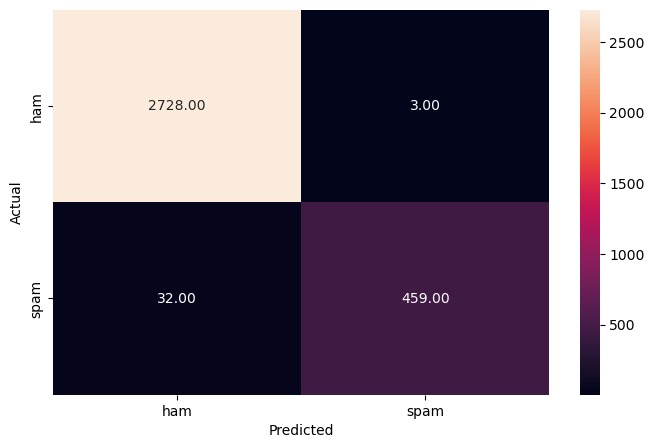

In [44]:
# making predictions on the test set
y_pred_train = model.predict(X_train)

metrics_score(y_train, y_pred_train)

**Model performance on the testing data**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       683
           1       0.83      0.82      0.82       123

    accuracy                           0.95       806
   macro avg       0.90      0.90      0.90       806
weighted avg       0.95      0.95      0.95       806



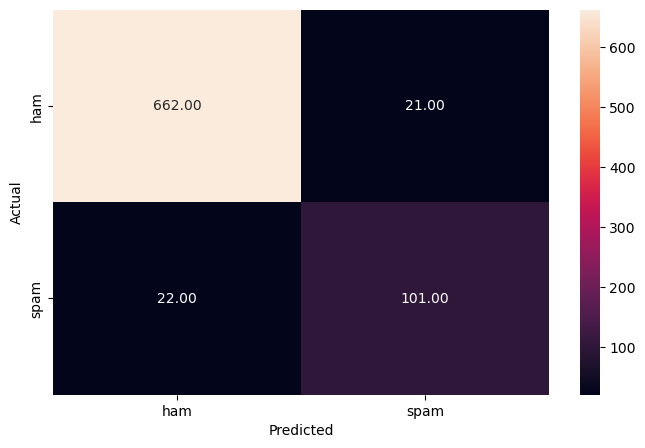

In [45]:
# making predictions on the test set
y_pred = model.predict(X_test)

metrics_score(y_test, y_pred)

- Random Forest model is able to perform well for both the classes present in the data on training and testing data through Bag of Words vectors.
- The results are  generalized, model does not overfitted.

### **3.2 TF-IDF Vectorization**

**TF-IDF** is an abbreviation for **Term Frequency-Inverse Document Frequency**. The process of **TF-IDF vectorization** involves computing the **TF-IDF score** for each word in your corpus in relation to that document and then storing that information in a vector.
<br>
<br>
**Term Frequency (TF)**- It shows us how many times the word appears in each report in the corpus. It is the ratio of the number of times a word appears in a report to the total number of words in that record. It increases in proportion to the number of times that term appears in the record.
<br>
<br>
**Inverse Data Frequency (IDF)** - It is used to calculate the occurrence of rare words across all reports in the corpus. Words that appear infrequently in the corpus have a high IDF score.
<br>
<br>
When we combine these two, we get the TF-IDF score for a word in a record in the corpus.

In [46]:
# Creating the object to the TfidfVectorizer class

vectorizer = TfidfVectorizer(max_features = 200)

**TfidfVectorizer** has several parameters that are useful to create the effective model. We mostly, use below three parameters in TfidfVectorizer() function.

- **ngram_range:** The lower and upper bounds of the range of n-values to be extracted for various n-grams. All values of n such that min_n <= n <= max_n will be used. An ngram range of (1, 1), for example, denotes just unigrams, (1, 2) means unigrams and bigrams, and (2, 2), only bigrams.

- **max_df(float or int), default=1.0**: When creating the vocabulary, it excludes terms with a document frequency that is strictly greater than the given threshold (corpus-specific stop words). The parameter represents a proportion of documents if it is a float in the range [0.0, 1.0], otherwise it is an integer absolute count. If vocabulary is not None, this parameter is ignored.


- **max_features(int), default=None:** If not None, it creates a vocabulary that only considers the top max features arranged by term frequency across the corpus.


There are other parameters which can be useful for data cleaning, refer to this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">source</a> to explore more on it.

In [47]:
# fit and transforming into vectors from the text data
tf_vectors = vectorizer.fit_transform(data['text']).toarray()

In [33]:
# get indexing
print('\nWord indexes:')
print(vectorizer.vocabulary_)
 
# tf-idf values
print('\ntf-idf values:')
print(tf_vectors)


Word indexes:
{'hope': 70, 'having': 62, 'good': 52, 'pay': 116, 'ask': 5, 'room': 137, 'sure': 154, 'thing': 162, 'big': 11, 'hour': 71, 'work': 193, 'night': 110, 'tell': 157, 'told': 167, 'come': 27, 'coming': 28, 'wish': 189, 'gun': 57, 'sent': 142, 'think': 163, 'cost': 30, 'contact': 29, 'love': 92, 'need': 106, 'stop': 152, 'ur': 174, 'today': 166, 'plan': 123, 'sleep': 146, 'said': 139, 'cant': 17, 'wait': 178, 'hear': 63, 'text': 158, 'oh': 114, 'got': 53, 'job': 74, 'yeah': 197, 'use': 175, 'help': 65, 'let': 82, 'like': 84, 'leave': 80, 'min': 99, 'pick': 121, 'tomorrow': 168, 'dun': 38, 'hey': 66, 'want': 181, 'co': 26, 'going': 50, 'enjoy': 41, 'book': 13, 'minute': 100, 'thought': 164, 'thats': 161, 'soon': 148, 'mean': 95, 'time': 165, 'stuff': 153, 'phone': 119, 'look': 89, 'lot': 91, 'word': 192, 'dont': 36, 'holiday': 68, 'send': 141, 'heart': 64, 'feel': 42, 'day': 33, 'go': 49, 'miss': 101, 'long': 88, 'remember': 134, 'wat': 183, 'meeting': 97, 'right': 136, 'home

In [34]:
# Independent feature
X = tf_vectors

# Target feature
y = data["type"].map({'ham':0,'spam':1})

In [35]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [36]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (3222, 200)
Shape of test set :  (806, 200)
Percentage of classes in training set:
0    0.84761
1    0.15239
Name: type, dtype: float64
Percentage of classes in test set:
0    0.847395
1    0.152605
Name: type, dtype: float64


In [37]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 1)

# fitting the model on training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Model performance on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2731
           1       0.98      0.93      0.96       491

    accuracy                           0.99      3222
   macro avg       0.99      0.97      0.98      3222
weighted avg       0.99      0.99      0.99      3222



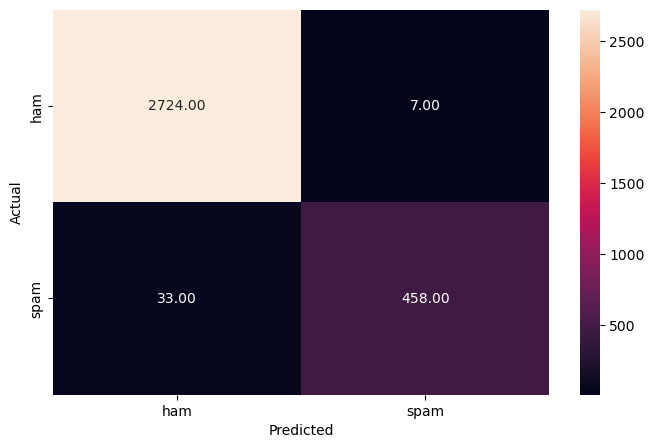

In [38]:
# making predictions on the test set
y_pred_train = model.predict(X_train)

metrics_score(y_train, y_pred_train)

- The model accuracy on the training data was 99%.

Let's have a look on the testing data score to verify whether the model is performing well or overfitted the data.

**Model performance on the testing data**

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       683
           1       0.86      0.78      0.82       123

    accuracy                           0.95       806
   macro avg       0.91      0.88      0.89       806
weighted avg       0.95      0.95      0.95       806



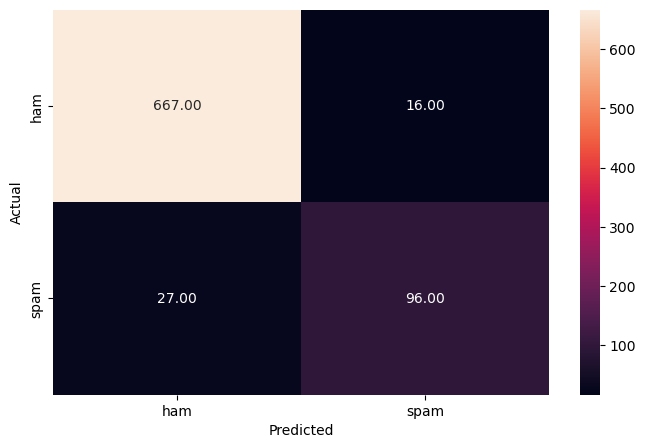

In [39]:
# making predictions on the test set
y_pred = model.predict(X_test)

metrics_score(y_test, y_pred)

- The testing accuracy was 95% with an macro average score of 89%.
- The F1-score for the class 1 is 82%.

# **4. Conclusion**

- We were able to build an effective model that can able to detect the messages either **spam** or **ham**.
- The vectors created from Bag of Words technique were able to give 90% macro average score on the test data. Also the precision and recall scores for class 1 were more balanced.
- Similar to Bag of Words, TFIDF technique was able to give 89% macro average score on the test data. The recall for class 1 is low as compared to the recall score given by the model through bag of words vectors.